In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

In [2]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [3]:
!python --version 

Python 3.5.2 :: Continuum Analytics, Inc.


# Prepare a minimal data set. 

In [4]:
df = pd.DataFrame({'age':[1.,2,3,4,5,6,7,8,9],
                   'height':[4, 4.5, 5, 6, 7, 8, 9, 9.5, 10],
                   'gender':['M','F', 'F','M','M','F', 'F','M', 'F'],
                   #'hair color':['brown','black', 'brown', 'blonde', 'brown', 'red', 
                   #              'brown', 'brown', 'black' ],
                   'hair length':[1,6,2,3,1,5,6,5,3] })

Plotting separate data columns as separate sub-plots:

In [5]:
def plot_2_subplots(df, x1, y1, y2, x2=None, title=None):
    fig, axs = plt.subplots(2, 1, figsize=(5, 4))
    colors = ['c','b']

    # get the data array for x1:
    x1d = df[x1]
    
    # get the data array for x2:
    if x2 is None: # use x1 as x2
        x2d=df[x1]
        x2=x1
        # todo (?) share x axis if x2 was None?
    else:
        x2d=df[x2]
        
    # get the data arrays for y1, y2:
    y1d=df[y1]
    y2d=df[y2]
    
    axs[0].plot(x1d, y1d, linestyle='--', marker='o', color=colors[0]) #, label=y1)
    axs[0].set_xlabel(x1)
    axs[0].set_ylabel(y1)
    
    axs[1].plot(x2d, y2d, linestyle='--', marker='o', color=colors[1]) #, label=y2)
    axs[1].set_xlabel(x2)
    axs[1].set_ylabel(y2)
    
    for subplot in axs:
        subplot.legend(loc='best') 

    axs[0].axhline(y=0, color='k')
    # fill 2nd plot
    axs[1].axhline(y=0, color='k')
    plt.legend()

    if title is not None:
        plt.title(title)
    plt.tight_layout()
    return fig


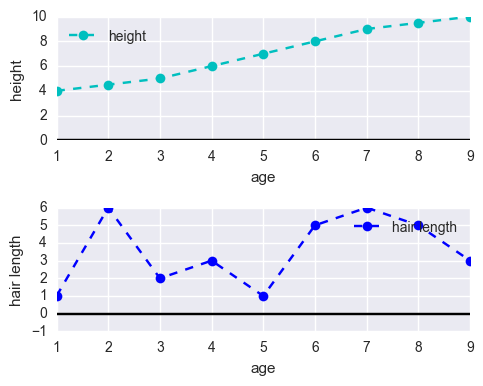

In [6]:
p = plot_2_subplots(df=df, x1='age', y1='height', y2='hair length', x2=None, title=None)

Plot multiple groups (from same data columns) onto the same plot.

In [7]:
df.plot

In [8]:
def plot_by_group(df, group, x, y, title=None):
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    # todo: move title up(?)
    if title is not None:
        ax.set_title(title)
    
    for tup, group_df in df.groupby(group):
        # sort on the x attribute
        group_df = group_df.sort_values(x)
        # todo: print label in legend. 
        ax.plot(group_df[x], group_df[y], marker='o', label=tup[0])
        print(tup)
    
    # todo: put legend outside the figure
    plt.legend()

F
M


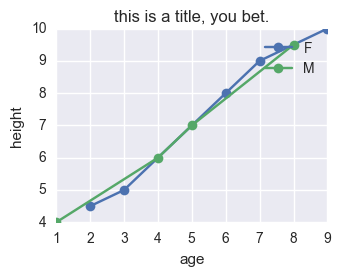

In [9]:
plot_by_group(df=df, group='gender', x='age', y='height', title='this is a title, you bet.')

Jake Vanderplas:

plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. 

http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb